### Treść zadania

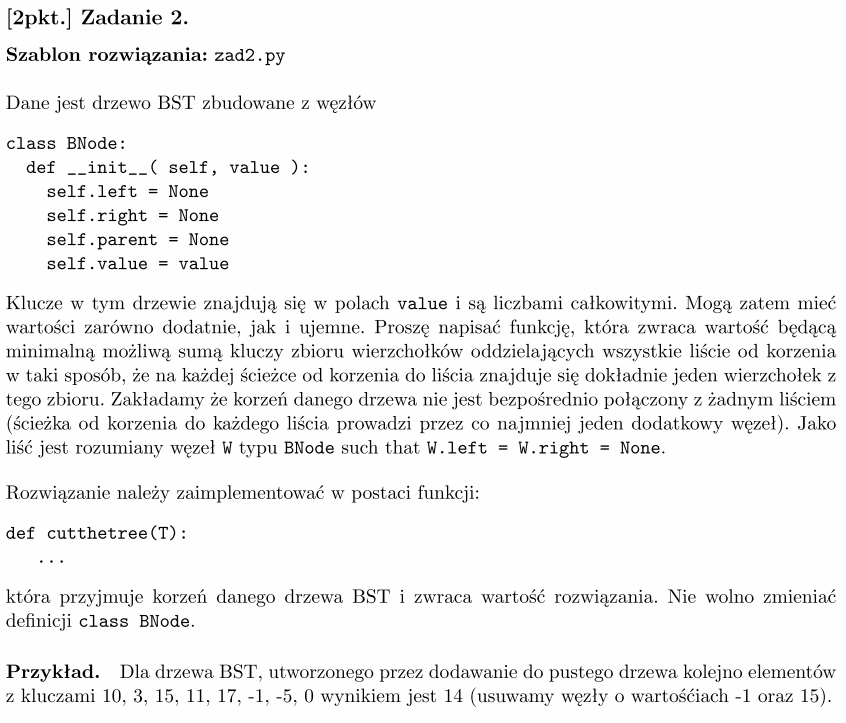

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
class BNode:
    def __init__(self, value):
        self.left = None
        self.right = None
        self.parent = None
        self.value = value


def dodaj(T, key):
    W = BNode(key)
    if key < T.value:
        if T.left == None:
            T.left = W
            W.parent = T
        else:
            dodaj(T.left, key)
    else:
        if T.right == None:
            T.right = W
            W.parent = T
        else:
            dodaj(T.right, key)


def createtree(keys):
    T = BNode(keys[0])
    for i in range(1, len(keys)):
        dodaj(T, keys[i])
    return T


TESTS = [
    ([1, -1, -2, 4, 5, 6, 7], 3),
    ([5, 2, 1, 6, 7, 8], 8),
    ([0, -2, -3, -1, 4, 3, 5], 2),
    ([5, 6, 7, 10, 8, 11, 3, -1, -5, -10, -2], 1),
    ([10, 3, 15, 11, 17, -1, -5, 0], 14),
    ([10, -5, -6, -7, 1, 12, 11], 7),
    ([10, 2, 1, 3, 12, 11], 14),
    ([-1000, -1002, -1003, -1001, 10, -200, 100, -201, -199, 99, 101], -1002 + (-200) + 100),
    ([-1000, -1002, -1003, -1001, 10, -100, 200, -101, -99, 199, 201], -1002 + 10)
]


def runtests(f):
    problems_count = 0
    for i, x in enumerate(TESTS):
        print()
        print(f"--- (test #{i+1}) ----------------------")
        Tr = createtree(x[0])
        v = f(Tr)
        print("Dane wejściowe", x[0])
        print("Uzyskany wynik: ", v)
        print("Oczekiwany wynik: ", x[1])
        if v == x[1]:
            print("OK!")
        else:
            print("PROBLEM!")
            problems_count += 1

    print()
    print("------------------------------------")
    print("------------------------------------")
    if problems_count > 0:
        print(f"Jest {problems_count} problemów!")
    else:
        print("Wszystko OK!")

### Omówienie algorytmu

Algorytm polega na rekurencyjnym wyznaczeniu rozwiązania. Ponieważ nie możemy usunąć
korzenia drzewa, zaczynamy od jego prawego i lewego dziecka (możemy założyć, że ścieżka
od korzenia do liścia zawiera po drodze przynajmniej jeden wierzchołek, co jest powiedziane
w poleceniu). Sama funkcja rekurencyjna opiera się na tym, że sprawdzamy, czy w danym
momencie bardziej opłaca nam się usunąć bieżący wierzchołek, czy usunąć odpowiednie wierzchołki
w poddrzewach dzieci bieżącego wierzchołka. Jeżeli bieżący wierzchołek nie ma żadnych dzieci,
to zwracamy wartość nieskończoność, która oznacza, że nie możemy go usunąć (bo nie usuwamy liści).
Jeżeli jednak wierzchołek ma tylko jedno dziecko (lewe lub prawe), to możemy albo usunąć bieżący
wierzchołek, albo poszukać lepszego rozwiązania w poddrzewie dziecka. W przypadku gdy wierzchołek
ma dwoje dzieci, możemy albo go usunąć, albo usuąć odpowiednie wierzchołki w poddrzewach jego
dzieci, więc wtedy rekurencyjnie wyznaczamy rozwiązanie dla obu poddrzew i je sumujemy, a później
porównujemy z wartością bieżącego wierzchołka. Za każdym razem zwracamy minimum z wyznaczonej
sumy dla dziecka/dzieci oraz wartości (klucza) bieżącego wierzchołka, aby zminimalizować sumę
wartości (kluczy) usuwanych wierzchołków.

### Złożoność

###### Obliczeniowa:
$ O(n) $ - gdzie $ n $ - liczba węzłów w drzewie
###### Pamięciowa:
$ O(n) $

### Implementacja

In [2]:
class BNode:
    def __init__(self, value):
        self.left = None
        self.right = None
        self.parent = None
        self.value = value


def cutthetree(T):
    inf = float('inf')

    def recur(node):
        if not node.left and not node.right:
            return inf
        if not node.right:
            return min(node.value, recur(node.left))
        if not node.left:
            return min(node.value, recur(node.right))
        return min(node.value, recur(node.left) + recur(node.right))

    return recur(T.left) + recur(T.right)

###### Kilka testów

In [3]:
runtests(cutthetree)


--- (test #1) ----------------------
Dane wejściowe [1, -1, -2, 4, 5, 6, 7]
Uzyskany wynik:  3
Oczekiwany wynik:  3
OK!

--- (test #2) ----------------------
Dane wejściowe [5, 2, 1, 6, 7, 8]
Uzyskany wynik:  8
Oczekiwany wynik:  8
OK!

--- (test #3) ----------------------
Dane wejściowe [0, -2, -3, -1, 4, 3, 5]
Uzyskany wynik:  2
Oczekiwany wynik:  2
OK!

--- (test #4) ----------------------
Dane wejściowe [5, 6, 7, 10, 8, 11, 3, -1, -5, -10, -2]
Uzyskany wynik:  1
Oczekiwany wynik:  1
OK!

--- (test #5) ----------------------
Dane wejściowe [10, 3, 15, 11, 17, -1, -5, 0]
Uzyskany wynik:  14
Oczekiwany wynik:  14
OK!

--- (test #6) ----------------------
Dane wejściowe [10, -5, -6, -7, 1, 12, 11]
Uzyskany wynik:  7
Oczekiwany wynik:  7
OK!

--- (test #7) ----------------------
Dane wejściowe [10, 2, 1, 3, 12, 11]
Uzyskany wynik:  14
Oczekiwany wynik:  14
OK!

--- (test #8) ----------------------
Dane wejściowe [-1000, -1002, -1003, -1001, 10, -200, 100, -201, -199, 99, 101]
Uzyskany 